In [1]:
## Ignore this part, it kills any previously running instance of program thus freeing GPU and memory.
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

In [2]:
# Importing packages
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy

Using TensorFlow backend.


In [3]:
# Importing data
seed = 7
numpy.random.seed(seed)
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

In [4]:
# Defining ANN architecture and training GA optimised ANN
# Currently following parameters are being optimized but it can further be extended to any parameter of ANN
# Parameters: Number of epochs(Passes), Batch Size, Activation function, weight initialization
def create_model(optimizer='rmsprop', init='glorot_uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, kernel_initializer=init, activation='relu'))
	model.add(Dense(8, kernel_initializer=init, activation='relu'))
	model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model, verbose=0)
optimizers = ['rmsprop', 'adam']  # Activation function
init = ['glorot_uniform', 'normal', 'uniform'] # Method for neuron's weight initialization
epochs = [20, 30]
batches = [20, 50,70]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
cv = EvolutionaryAlgorithmSearchCV(estimator=model,
                                   params=param_grid,
                                   scoring="roc_auc",
                                   cv=StratifiedKFold(n_splits=3),
                                   verbose=1,
                                   population_size=50,
                                   gene_mutation_prob=0.1,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5, # Due to bug in package total generations will be 6 i.e +1
                                   n_jobs=-1)
%time cv.fit(X, Y)

Types [1, 1, 1, 1] and maxint [1, 1, 2, 2] detected
--- Evolve in 36 possible combinations ---
gen	nevals	avg     	min     	max     
0  	50    	0.613919	0.477796	0.712255
1  	32    	0.654931	0.565958	0.712255
2  	29    	0.681432	0.556459	0.712255
3  	26    	0.689619	0.64049 	0.712255
4  	32    	0.696849	0.640255	0.712255
5  	22    	0.708038	0.678702	0.712255
Best individual is: {'optimizer': 'adam', 'epochs': 30, 'batch_size': 20, 'init': 'normal'}
with fitness: 0.7122545930022429
CPU times: user 7min 51s, sys: 19.9 s, total: 8min 11s
Wall time: 6min 43s


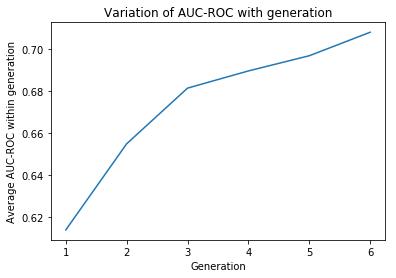

In [10]:
# Plotting average fitness value within each generation against number of generations trained
import matplotlib.pyplot as plt
x = [1,2,3,4,5,6]
y = [0.613919,0.654931,0.681432,0.689619,0.696849,0.708038]
plt.plot(x,y)
plt.xlabel('Generation')
plt.ylabel('Average AUC-ROC within generation')
plt.title('Variation of AUC-ROC with generation')
plt.show()